In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn import metrics

import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Conv2D,Flatten  

In [3]:
Train_no=1
engine_id=50


df=pd.read_csv("Processed_Train_001.csv".format(Train_no))
df = df[df['ID']==engine_id]
df = df.drop(columns=['ID'])

df

,Cycle,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure7,SensorMeasure8,SensorMeasure11,SensorMeasure12,SensorMeasure13,SensorMeasure15,SensorMeasure17,SensorMeasure20,SensorMeasure21,RUL
9711,1,642.12,1582.50,1400.44,553.76,2388.05,47.31,521.97,2388.08,8.4366,394,38.96,23.3947,197
9712,2,642.62,1589.90,1404.14,554.52,2388.02,47.31,522.27,2388.02,8.4211,394,38.91,23.4594,196
9713,3,642.55,1582.75,1403.42,554.26,2388.04,47.41,522.40,2388.04,8.3931,392,38.97,23.3230,195
9714,4,642.61,1586.91,1403.46,554.56,2388.05,47.46,522.25,2388.08,8.4286,393,38.91,23.3886,194
9715,5,642.41,1589.70,1401.43,554.26,2388.05,47.33,522.10,2388.00,8.4295,394,38.98,23.3340,193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9904,194,643.77,1604.93,1423.51,551.41,2388.18,48.16,519.85,2388.19,8.5043,396,38.42,23.0543,4
9905,195,643.33,1605.31,1434.87,551.25,2388.17,48.14,519.33,2388.21,8.5352,395,38.45,23.0191,3
9906,196,643.32,1602.26,1430.01,551.40,2388.19,48.24,519.88,2388.17,8.5034,395,38.45,23.0379,2
9907,197,643.73,1599.94,1432.87,551.18,2388.19,48.22,519.48,2388.20,8.5241,397,38.52,23.0832,1


In [4]:
Train_no=1
engine_id=50


df=pd.read_csv("Processed_Train_002.csv".format(Train_no))
df = df[df['ID']==engine_id]
df = df.drop(columns=['ID'])

df

,Cycle,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure7,SensorMeasure8,SensorMeasure11,SensorMeasure12,SensorMeasure13,SensorMeasure15,SensorMeasure17,SensorMeasure20,SensorMeasure21,RUL
9894,1,604.26,1494.32,1301.77,396.35,2318.83,45.09,372.46,2388.00,8.6023,370,28.71,17.2424,221
9895,2,548.88,1341.98,1126.78,138.94,2212.02,41.79,131.07,2388.15,9.3823,329,10.76,6.3961,220
9896,3,555.34,1362.84,1123.74,195.28,2223.02,41.53,183.99,2388.08,9.2689,333,15.05,8.9857,219
9897,4,607.62,1481.87,1241.20,334.92,2323.95,44.09,315.39,2388.04,9.1821,363,24.59,14.7270,218
9898,5,549.69,1353.57,1117.94,138.95,2211.98,41.84,130.37,2388.11,9.3551,330,10.61,6.3642,217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10111,218,537.63,1271.83,1062.26,174.76,1915.18,37.21,164.04,2028.09,11.0080,309,14.05,8.4241,4
10112,219,557.15,1376.43,1146.92,193.91,2222.84,42.64,182.32,2387.92,9.4143,338,14.63,8.7040,3
10113,220,608.45,1500.97,1269.84,332.58,2324.10,44.84,314.12,2388.24,9.3144,369,24.34,14.4817,2
10114,221,550.09,1365.39,1144.24,138.29,2211.61,42.68,130.05,2387.66,9.4931,334,10.45,6.3340,1


In [5]:
Train_no=1
engine_id=50


df=pd.read_csv("Processed_Train_003.csv".format(Train_no))
df = df[df['ID']==engine_id]
df = df.drop(columns=['ID'])

df

,Cycle,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure7,SensorMeasure8,SensorMeasure11,SensorMeasure12,SensorMeasure13,SensorMeasure15,SensorMeasure17,SensorMeasure20,SensorMeasure21,RUL
12920,1,641.91,1587.33,1391.59,554.62,2388.01,47.37,522.60,2387.99,8.4409,391,38.94,23.3599,160
12921,2,642.17,1583.83,1394.10,553.71,2388.02,47.05,521.57,2388.01,8.4126,392,38.87,23.4434,159
12922,3,642.44,1582.99,1393.32,553.94,2387.97,47.19,522.82,2387.98,8.4304,392,39.06,23.3846,158
12923,4,642.47,1594.34,1401.57,554.73,2388.00,47.37,522.06,2388.02,8.3895,391,38.90,23.3644,157
12924,5,642.24,1582.17,1402.04,554.41,2388.02,47.11,521.88,2388.02,8.4207,392,39.17,23.4260,156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13076,157,643.44,1600.75,1420.61,551.34,2388.23,48.31,519.93,2388.33,8.4940,395,38.45,23.0606,4
13077,158,643.77,1604.93,1422.92,551.44,2388.31,48.07,519.49,2388.25,8.5273,396,38.56,23.1199,3
13078,159,643.30,1605.88,1431.36,551.55,2388.25,48.24,520.17,2388.27,8.5199,394,38.60,23.0053,2
13079,160,643.79,1600.81,1434.32,551.27,2388.28,48.15,519.67,2388.29,8.5004,397,38.41,23.1993,1


In [6]:
Train_no=1
engine_id=50


df=pd.read_csv("Processed_Train_004.csv".format(Train_no))
df = df[df['ID']==engine_id]
df = df.drop(columns=['ID'])

df

,Cycle,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure7,SensorMeasure8,SensorMeasure11,SensorMeasure12,SensorMeasure13,SensorMeasure15,SensorMeasure17,SensorMeasure20,SensorMeasure21,RUL
12485,1,606.98,1482.04,1241.33,335.35,2323.85,44.02,315.61,2387.99,9.1990,365,24.66,14.7896,171
12486,2,554.23,1359.70,1124.42,195.25,2222.89,41.64,183.42,2388.01,9.2543,332,14.96,9.0234,170
12487,3,554.98,1365.18,1122.45,194.65,2222.91,41.50,183.49,2388.03,9.2806,332,14.87,8.9161,169
12488,4,549.52,1339.92,1121.17,139.21,2211.93,41.78,130.61,2388.05,9.3539,330,10.75,6.4001,168
12489,5,604.72,1499.56,1296.40,395.18,2318.80,45.20,372.10,2388.11,8.6171,367,28.60,17.1786,167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12652,168,555.96,1376.53,1139.20,200.58,2223.70,42.52,189.02,2388.84,9.0720,337,15.32,9.0288,4
12653,169,607.97,1496.19,1265.42,343.31,2324.75,44.75,323.67,2388.93,9.0035,369,24.84,15.0505,3
12654,170,608.12,1493.34,1273.26,344.84,2324.93,44.93,324.70,2389.10,8.9811,368,24.95,15.1075,2
12655,171,607.86,1493.60,1264.91,345.01,2324.96,45.10,325.34,2389.08,8.9693,368,25.05,14.9718,1


In [7]:
scaler=MinMaxScaler()
df = scaler.fit_transform(df)
print('Shape of df for engine {}: '.format(engine_id),df.shape)
df

Shape of df for engine 50:  (172, 14)


array([[0.        , 0.65949921, 0.65238982, ..., 0.48499318, 0.48788673,
        1.        ],
       [0.00584795, 0.1684818 , 0.30720614, ..., 0.15416098, 0.15709098,
        0.99415205],
       [0.01169591, 0.17546309, 0.32266802, ..., 0.15109141, 0.15093539,
        0.98830409],
       ...,
       [0.98830409, 0.67011077, 0.6842729 , ..., 0.49488404, 0.50612404,
        0.01169591],
       [0.99415205, 0.66769059, 0.68500649, ..., 0.49829468, 0.49833919,
        0.00584795],
       [1.        , 0.1269664 , 0.3302861 , ..., 0.0133015 , 0.01079667,
        0.        ]])

In [8]:
features = df[:,0:-1]
target = df[:,-1]

target

array([1.        , 0.99415205, 0.98830409, 0.98245614, 0.97660819,
       0.97076023, 0.96491228, 0.95906433, 0.95321637, 0.94736842,
       0.94152047, 0.93567251, 0.92982456, 0.92397661, 0.91812865,
       0.9122807 , 0.90643275, 0.9005848 , 0.89473684, 0.88888889,
       0.88304094, 0.87719298, 0.87134503, 0.86549708, 0.85964912,
       0.85380117, 0.84795322, 0.84210526, 0.83625731, 0.83040936,
       0.8245614 , 0.81871345, 0.8128655 , 0.80701754, 0.80116959,
       0.79532164, 0.78947368, 0.78362573, 0.77777778, 0.77192982,
       0.76608187, 0.76023392, 0.75438596, 0.74853801, 0.74269006,
       0.73684211, 0.73099415, 0.7251462 , 0.71929825, 0.71345029,
       0.70760234, 0.70175439, 0.69590643, 0.69005848, 0.68421053,
       0.67836257, 0.67251462, 0.66666667, 0.66081871, 0.65497076,
       0.64912281, 0.64327485, 0.6374269 , 0.63157895, 0.62573099,
       0.61988304, 0.61403509, 0.60818713, 0.60233918, 0.59649123,
       0.59064327, 0.58479532, 0.57894737, 0.57309942, 0.56725

In [9]:
win_length = 25   
feature_num = 13  

ts_generator = TimeseriesGenerator(features,target,length=win_length,sampling_rate=1,batch_size=1)

In [10]:
ts_generator[0]


(array([[[0.00000000e+00, 6.59499209e-01, 6.52389820e-01, 5.30845469e-01,
          4.59670465e-01, 8.63452882e-01, 6.63770634e-01, 4.58571464e-01,
          9.96924611e-01, 3.61998927e-01, 6.66666667e-01, 4.84993179e-01,
          4.87886732e-01],
         [5.84795322e-03, 1.68481802e-01, 3.07206140e-01, 2.35259911e-01,
          1.33165536e-01, 6.50083480e-01, 4.56993918e-01, 1.31522304e-01,
          9.96980024e-01, 3.83191538e-01, 3.00000000e-01, 1.54160982e-01,
          1.57090980e-01],
         [1.16959064e-02, 1.75463092e-01, 3.22668021e-01, 2.30279126e-01,
          1.31767228e-01, 6.50125748e-01, 4.44830582e-01, 1.31695490e-01,
          9.97035436e-01, 3.93270484e-01, 3.00000000e-01, 1.51091405e-01,
          1.50935386e-01],
         [1.75438596e-02, 1.24639300e-01, 2.51396648e-01, 2.27042880e-01,
          2.56356475e-03, 6.26920557e-01, 4.69157255e-01, 8.65929390e-04,
          9.97090849e-01, 4.21361232e-01, 2.77777778e-01, 1.05729877e-02,
          6.59732780e-03],
    

In [11]:
print('Shape of the input features',np.shape(ts_generator[0][0]))
print((ts_generator[0][0]))
print('\n')
print('Shape of the output variable',np.shape(ts_generator[0][1]))
print(ts_generator[0][1])

Shape of the input features (1, 25, 13)
[[[0.00000000e+00 6.59499209e-01 6.52389820e-01 5.30845469e-01
   4.59670465e-01 8.63452882e-01 6.63770634e-01 4.58571464e-01
   9.96924611e-01 3.61998927e-01 6.66666667e-01 4.84993179e-01
   4.87886732e-01]
  [5.84795322e-03 1.68481802e-01 3.07206140e-01 2.35259911e-01
   1.33165536e-01 6.50083480e-01 4.56993918e-01 1.31522304e-01
   9.96980024e-01 3.83191538e-01 3.00000000e-01 1.54160982e-01
   1.57090980e-01]
  [1.16959064e-02 1.75463092e-01 3.22668021e-01 2.30279126e-01
   1.31767228e-01 6.50125748e-01 4.44830582e-01 1.31695490e-01
   9.97035436e-01 3.93270484e-01 3.00000000e-01 1.51091405e-01
   1.50935386e-01]
  [1.75438596e-02 1.24639300e-01 2.51396648e-01 2.27042880e-01
   2.56356475e-03 6.26920557e-01 4.69157255e-01 8.65929390e-04
   9.97090849e-01 4.21361232e-01 2.77777778e-01 1.05729877e-02
   6.59732780e-03]
  [2.33918129e-02 6.38462254e-01 7.01822696e-01 6.70079895e-01
   5.99105083e-01 8.52780185e-01 7.66290182e-01 5.98332467e-01
  

In [12]:
X=[]
y=[]

x_temp, y_temp = ts_generator[0]
X.append(x_temp.reshape(x_temp.shape[1],x_temp.shape[2],1))
y.append(y_temp)

print(X)
print(y)

[array([[[0.00000000e+00],
        [6.59499209e-01],
        [6.52389820e-01],
        [5.30845469e-01],
        [4.59670465e-01],
        [8.63452882e-01],
        [6.63770634e-01],
        [4.58571464e-01],
        [9.96924611e-01],
        [3.61998927e-01],
        [6.66666667e-01],
        [4.84993179e-01],
        [4.87886732e-01]],

       [[5.84795322e-03],
        [1.68481802e-01],
        [3.07206140e-01],
        [2.35259911e-01],
        [1.33165536e-01],
        [6.50083480e-01],
        [4.56993918e-01],
        [1.31522304e-01],
        [9.96980024e-01],
        [3.83191538e-01],
        [3.00000000e-01],
        [1.54160982e-01],
        [1.57090980e-01]],

       [[1.16959064e-02],
        [1.75463092e-01],
        [3.22668021e-01],
        [2.30279126e-01],
        [1.31767228e-01],
        [6.50125748e-01],
        [4.44830582e-01],
        [1.31695490e-01],
        [9.97035436e-01],
        [3.93270484e-01],
        [3.00000000e-01],
        [1.51091405e-01],
       

In [13]:
def Data_format_conversion(Train_no,engine_id):    
    
    import pandas as pd
    import numpy as np
    df=pd.read_csv("Processed_Train_00{}.csv".format(Train_no))
    df = df[df['ID']==engine_id]
    df = df.drop(columns=['ID'])


    scaler=MinMaxScaler()
    df = scaler.fit_transform(df)
    print('Shape of df for engine {}: '.format(engine_id),df.shape)


    features = df[:,0:-1]
    target = df[:,-1]



    ts_generator = TimeseriesGenerator(features,target,length=win_length,sampling_rate=1,batch_size=1)

    X=[]
    y=[]
    for i in range(len(ts_generator)):
        x_temp, y_temp = ts_generator[i]
        X.append(x_temp.reshape(x_temp.shape[1],x_temp.shape[2],1))
        y.append(y_temp)

    X=np.array(X)  
    y=np.array(y)  
    
    return(X,y,scaler,features)

Training Model

In [15]:
win_length = 25   
feature_num = 13  

model=Sequential()

model.add(Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=(win_length,feature_num,1)))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mean_squared_error'])

In [17]:
Train_no=1
for engine_no in range(1,50):    
    X,y,scaler,features=Data_format_conversion(Train_no,engine_no) 
    
    model.fit(X,y,steps_per_epoch=5,epochs=15,shuffle=False,verbose=0)

Shape of df for engine 1:  (192, 14)
Shape of df for engine 2:  (287, 14)
Shape of df for engine 3:  (179, 14)
Shape of df for engine 4:  (189, 14)
Shape of df for engine 5:  (269, 14)
Shape of df for engine 6:  (188, 14)
Shape of df for engine 7:  (259, 14)
Shape of df for engine 8:  (150, 14)
Shape of df for engine 9:  (201, 14)
Shape of df for engine 10:  (222, 14)
Shape of df for engine 11:  (240, 14)
Shape of df for engine 12:  (170, 14)
Shape of df for engine 13:  (163, 14)
Shape of df for engine 14:  (180, 14)
Shape of df for engine 15:  (207, 14)
Shape of df for engine 16:  (209, 14)
Shape of df for engine 17:  (276, 14)
Shape of df for engine 18:  (195, 14)
Shape of df for engine 19:  (158, 14)
Shape of df for engine 20:  (234, 14)
Shape of df for engine 21:  (195, 14)
Shape of df for engine 22:  (202, 14)
Shape of df for engine 23:  (168, 14)
Shape of df for engine 24:  (147, 14)
Shape of df for engine 25:  (230, 14)
Shape of df for engine 26:  (199, 14)
Shape of df for engin

Loading the saved model

In [18]:
from keras.models import load_model

model = load_model('model_1.h5')
 


Predict on Training data

In [19]:
Train_no=1
engine_id = 1
X,y,scaler,features=Data_format_conversion(Train_no,engine_id) 

Shape of df for engine 1:  (192, 14)


In [20]:
X.shape

(167, 25, 13, 1)

In [21]:
prediction=model.predict(X) ######### prediction on trained data
np.shape(prediction)

6/6 [==============================] - 0s 4ms/step


(167, 1)

In [22]:
len(features)

192

In [23]:
rev_trans =pd.concat([pd.DataFrame(features[win_length:]),pd.DataFrame(prediction)],axis=1)
rev_trans

,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,0.130890,0.180,0.412356,0.063945,0.800469,0.21875,0.176923,0.825826,0.236842,0.374110,0.500,0.619048,0.842913,0.902325
1,0.136126,0.292,0.462284,0.212121,0.791080,0.06250,0.261538,0.741742,0.421053,0.235599,0.375,0.773810,0.902606,0.900620
2,0.141361,0.256,0.188218,0.142527,0.934272,0.37500,0.292308,0.912913,0.289474,0.414887,0.000,0.797619,0.601183,0.897266
3,0.146597,0.080,0.259698,0.190293,0.833333,0.15625,0.161538,0.864865,0.236842,0.328155,0.375,0.702381,0.740898,0.884300
4,0.151832,0.196,0.571839,0.064201,0.861502,0.21875,0.284615,0.798799,0.078947,0.247896,0.000,0.845238,0.835705,0.882697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,0.979058,0.816,0.890086,0.749872,0.291080,0.96875,0.746154,0.078078,0.684211,0.987055,0.750,0.202381,0.000000,0.006681
163,0.984293,0.988,0.667026,0.884181,0.000000,0.84375,0.807692,0.015015,0.947368,0.971521,0.625,0.166667,0.284421,0.005154
164,0.989529,0.772,0.776580,0.831279,0.138498,0.90625,1.000000,0.153153,1.000000,0.997411,1.000,0.178571,0.200887,0.001164
165,0.994764,0.652,0.889368,0.826656,0.051643,0.87500,0.861538,0.012012,0.868421,0.965696,0.500,0.130952,0.315468,-0.004348


In [24]:
rev_trans = scaler.inverse_transform(rev_trans)######## Transforming back to original scale
rev_trans =pd.DataFrame(rev_trans)
rev_trans

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,26.0,642.16,1589.08,1396.07,554.11,2388.07,47.26,522.28,2388.06,8.4260,394.0,38.86,23.4149,172.343990
1,27.0,642.44,1590.47,1401.84,554.07,2388.02,47.37,522.00,2388.13,8.4046,393.0,38.99,23.4472,172.018485
2,28.0,642.35,1582.84,1399.13,554.68,2388.12,47.41,522.57,2388.08,8.4323,390.0,39.01,23.2841,171.377789
3,29.0,641.91,1584.83,1400.99,554.25,2388.05,47.24,522.41,2388.06,8.4189,393.0,38.93,23.3597,168.901367
4,30.0,642.20,1593.52,1396.08,554.37,2388.07,47.40,522.19,2388.00,8.4065,390.0,39.05,23.4110,168.595124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,188.0,643.75,1602.38,1422.78,551.94,2388.31,48.00,519.79,2388.23,8.5207,396.0,38.51,22.9588,1.276099
163,189.0,644.18,1596.17,1428.01,550.70,2388.27,48.08,519.58,2388.33,8.5183,395.0,38.48,23.1127,0.984323
164,190.0,643.64,1599.22,1425.95,551.29,2388.29,48.33,520.04,2388.35,8.5223,398.0,38.49,23.0675,0.222393
165,191.0,643.34,1602.36,1425.77,550.92,2388.28,48.15,519.57,2388.30,8.5174,394.0,38.45,23.1295,-0.830562


In [25]:
    
df=pd.read_csv("Processed_Train_00{}.csv".format(Train_no))
df = df[df['ID']==engine_id]
df_actual = df.drop(columns=['ID'])
df_actual

,Cycle,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure7,SensorMeasure8,SensorMeasure11,SensorMeasure12,SensorMeasure13,SensorMeasure15,SensorMeasure17,SensorMeasure20,SensorMeasure21,RUL
0,1,641.82,1589.70,1400.60,554.36,2388.06,47.47,521.66,2388.02,8.4195,392,39.06,23.4190,191
1,2,642.15,1591.82,1403.14,553.75,2388.04,47.49,522.28,2388.07,8.4318,392,39.00,23.4236,190
2,3,642.35,1587.99,1404.20,554.26,2388.08,47.27,522.42,2388.03,8.4178,390,38.95,23.3442,189
3,4,642.35,1582.79,1401.87,554.45,2388.11,47.13,522.86,2388.08,8.3682,392,38.88,23.3739,188
4,5,642.37,1582.85,1406.22,554.00,2388.06,47.28,522.19,2388.04,8.4294,393,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,188,643.75,1602.38,1422.78,551.94,2388.31,48.00,519.79,2388.23,8.5207,396,38.51,22.9588,4
188,189,644.18,1596.17,1428.01,550.70,2388.27,48.08,519.58,2388.33,8.5183,395,38.48,23.1127,3
189,190,643.64,1599.22,1425.95,551.29,2388.29,48.33,520.04,2388.35,8.5223,398,38.49,23.0675,2
190,191,643.34,1602.36,1425.77,550.92,2388.28,48.15,519.57,2388.30,8.5174,394,38.45,23.1295,1


In [26]:
print('RMSE on This set:', np.sqrt(metrics.mean_squared_error(df_actual['RUL'][win_length:],rev_trans[13])))

RMSE on This set: 7.921938789838604


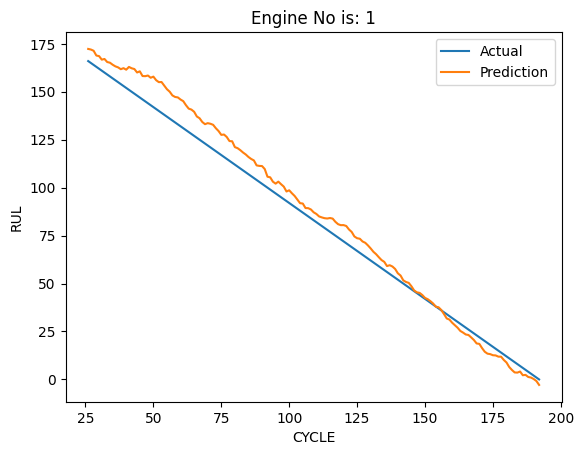

In [27]:
plt.plot(df_actual['Cycle'][win_length:],df_actual['RUL'][win_length:])
plt.plot(rev_trans[0],rev_trans[13])
plt.ylabel('RUL')
plt.xlabel('CYCLE')
plt.title('Engine No is: {}'.format(engine_id))
plt.legend([ 'Actual','Prediction'], loc='upper right')
plt.show()
print('\n')

Shape of df for engine 21:  (195, 14)
6/6 [==============================] - 0s 4ms/step
RMSE on This set: 37.829372238599724


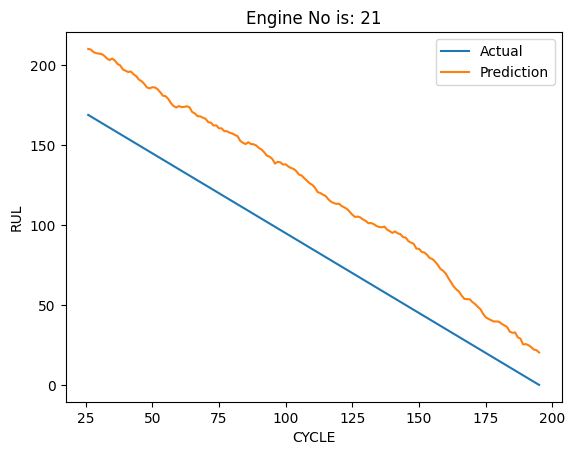



Shape of df for engine 32:  (191, 14)
6/6 [==============================] - 0s 4ms/step
RMSE on This set: 40.76407733334404


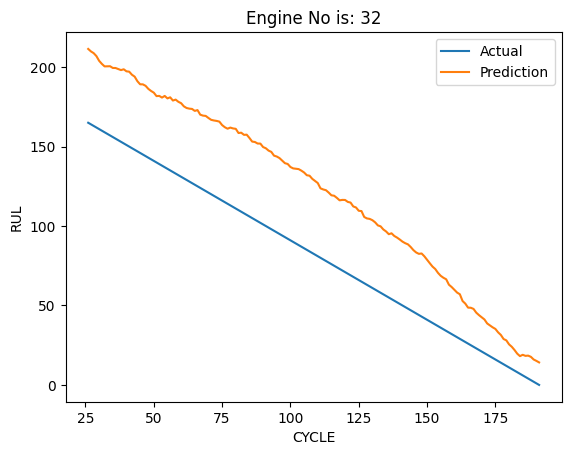



Shape of df for engine 40:  (188, 14)
6/6 [==============================] - 0s 3ms/step
RMSE on This set: 30.31111271896755


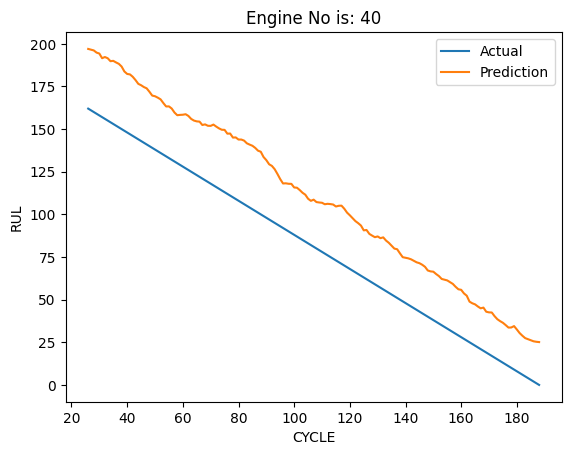



Shape of df for engine 32:  (191, 14)
6/6 [==============================] - 0s 3ms/step
RMSE on This set: 40.76407733334404


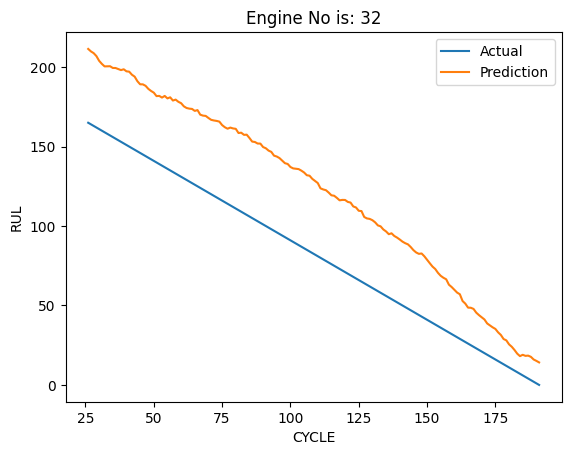



Shape of df for engine 48:  (231, 14)
7/7 [==============================] - 0s 3ms/step
RMSE on This set: 48.50700513128524


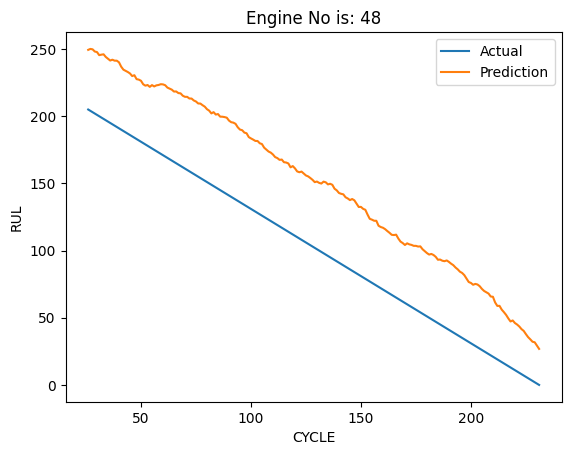



Shape of df for engine 44:  (192, 14)
6/6 [==============================] - 0s 3ms/step
RMSE on This set: 40.20431352834602


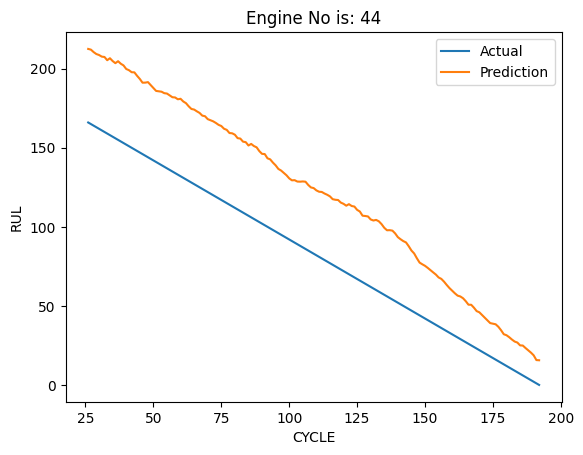



Shape of df for engine 16:  (209, 14)
6/6 [==============================] - 0s 3ms/step
RMSE on This set: 34.93196917319539


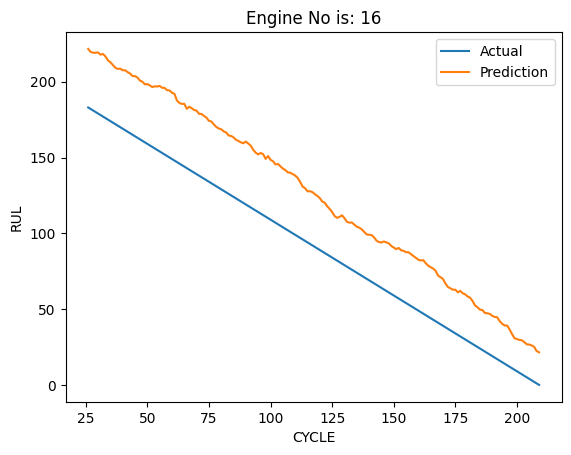



Shape of df for engine 14:  (180, 14)
5/5 [==============================] - 0s 3ms/step
RMSE on This set: 28.320732504112865


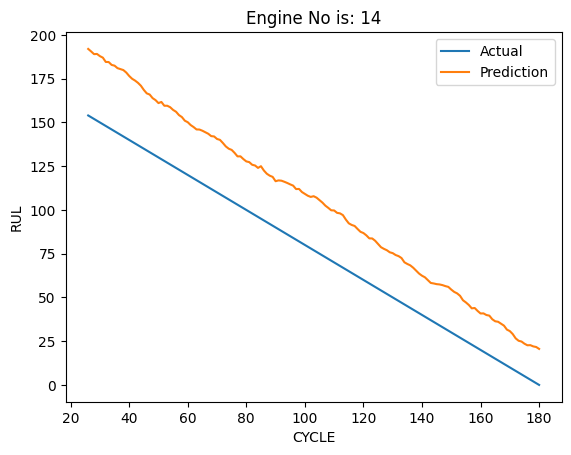



Shape of df for engine 39:  (128, 14)
4/4 [==============================] - 0s 3ms/step
RMSE on This set: 36.736338247069966


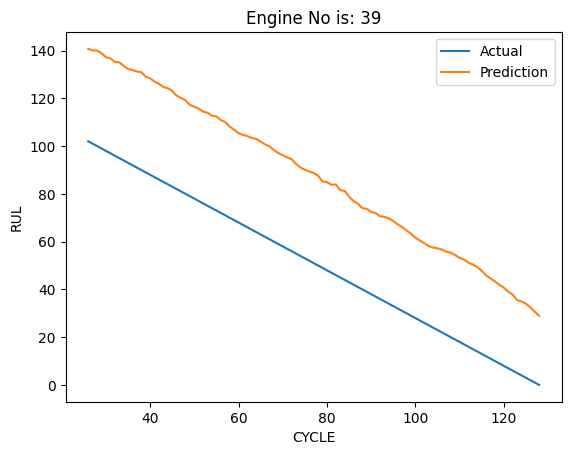



Shape of df for engine 12:  (170, 14)
5/5 [==============================] - 0s 3ms/step
RMSE on This set: 33.49791038836509


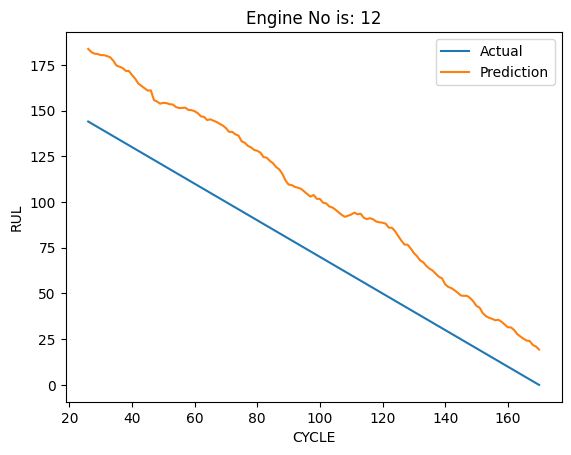



Shape of df for engine 15:  (207, 14)
6/6 [==============================] - 0s 3ms/step
RMSE on This set: 48.100742482091064


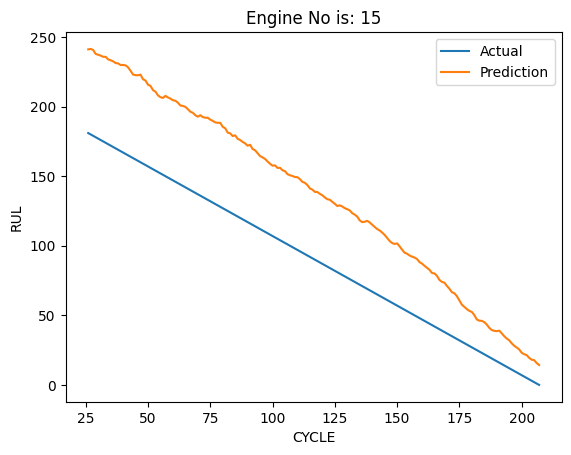



Shape of df for engine 39:  (128, 14)
4/4 [==============================] - 0s 4ms/step
RMSE on This set: 36.736338247069966


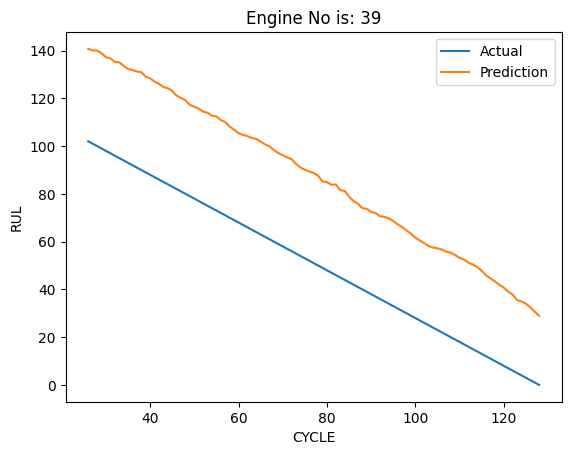



Shape of df for engine 12:  (170, 14)
5/5 [==============================] - 0s 3ms/step
RMSE on This set: 33.49791038836509


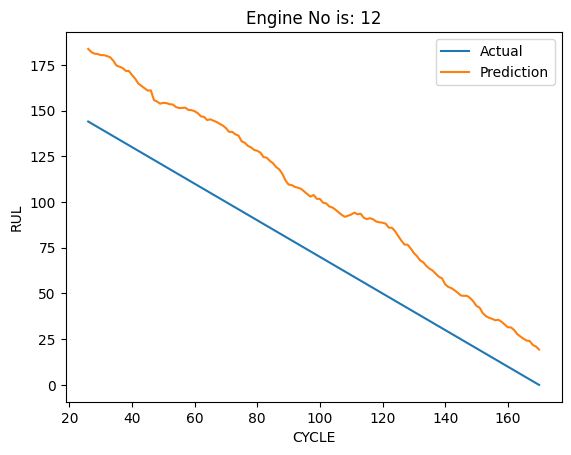



Shape of df for engine 42:  (196, 14)
6/6 [==============================] - 0s 3ms/step
RMSE on This set: 45.60404568349104


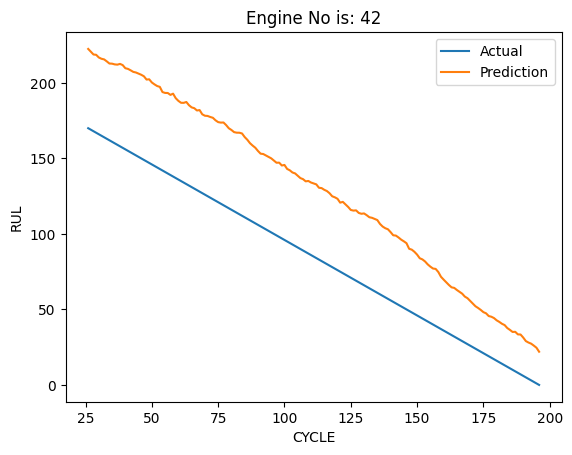



Shape of df for engine 5:  (269, 14)
8/8 [==============================] - 0s 4ms/step
RMSE on This set: 61.801111325219836


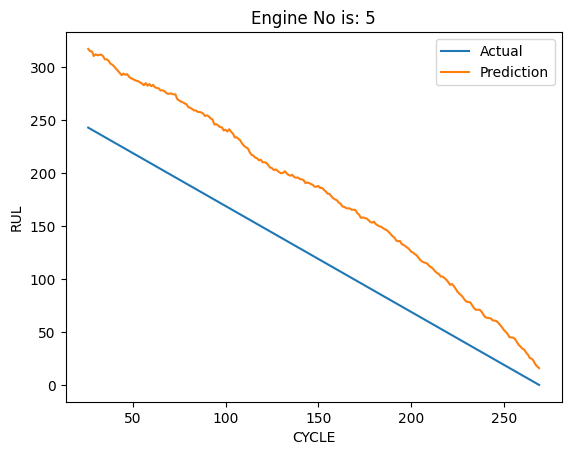



Shape of df for engine 15:  (207, 14)
6/6 [==============================] - 0s 3ms/step
RMSE on This set: 48.100742482091064


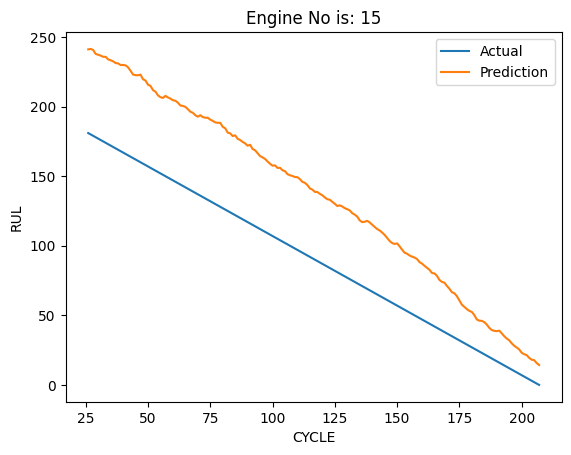



Shape of df for engine 6:  (188, 14)
6/6 [==============================] - 0s 4ms/step
RMSE on This set: 37.87802598303315


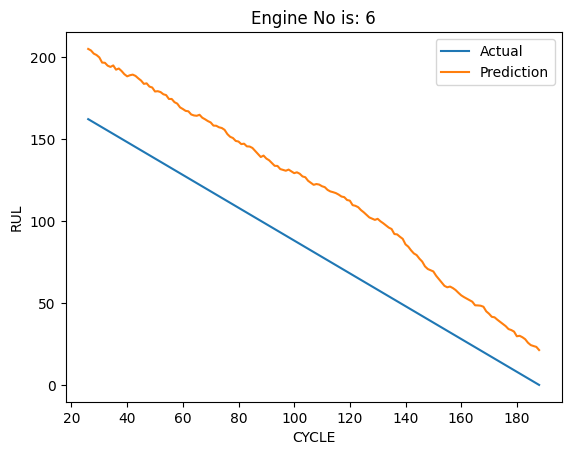



Shape of df for engine 5:  (269, 14)
8/8 [==============================] - 0s 4ms/step
RMSE on This set: 61.801111325219836


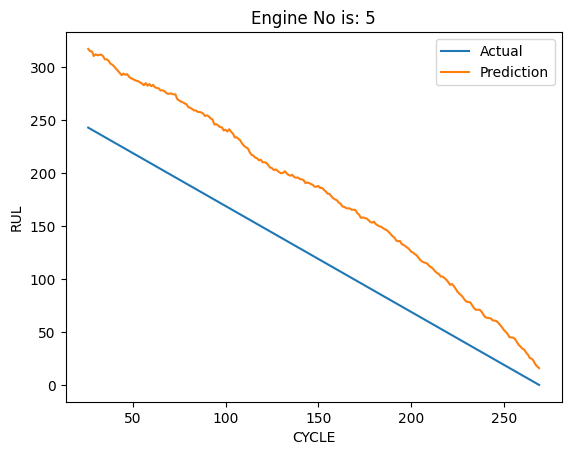



Shape of df for engine 40:  (188, 14)
6/6 [==============================] - 0s 3ms/step
RMSE on This set: 30.31111271896755


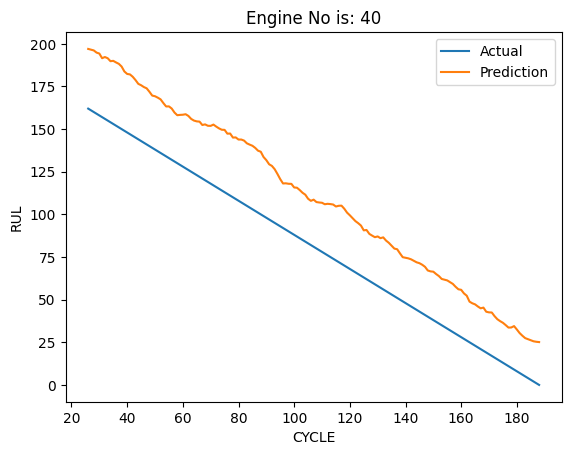



Shape of df for engine 35:  (181, 14)
5/5 [==============================] - 0s 3ms/step
RMSE on This set: 38.19082900422811


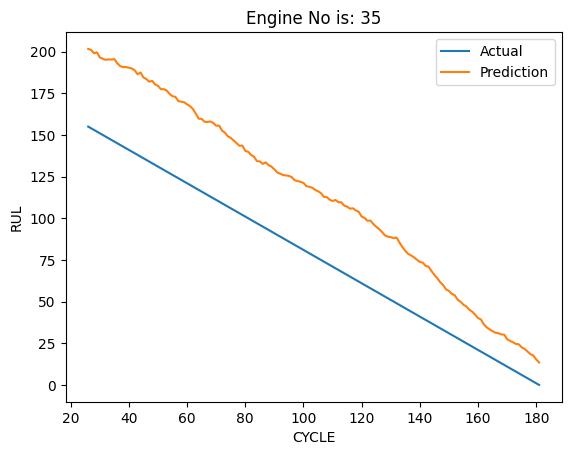



Shape of df for engine 46:  (256, 14)
8/8 [==============================] - 0s 3ms/step
RMSE on This set: 55.12713559726229


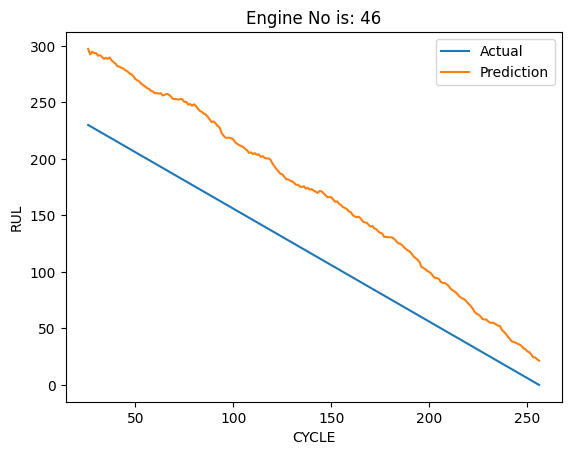



Shape of df for engine 42:  (196, 14)
6/6 [==============================] - 0s 3ms/step
RMSE on This set: 45.60404568349104


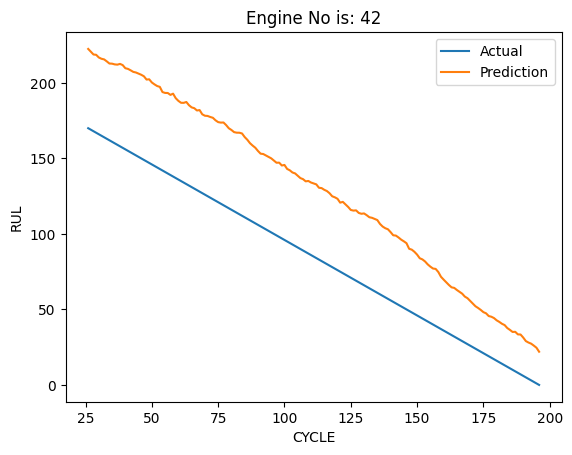



Shape of df for engine 44:  (192, 14)
6/6 [==============================] - 0s 3ms/step
RMSE on This set: 40.20431352834602


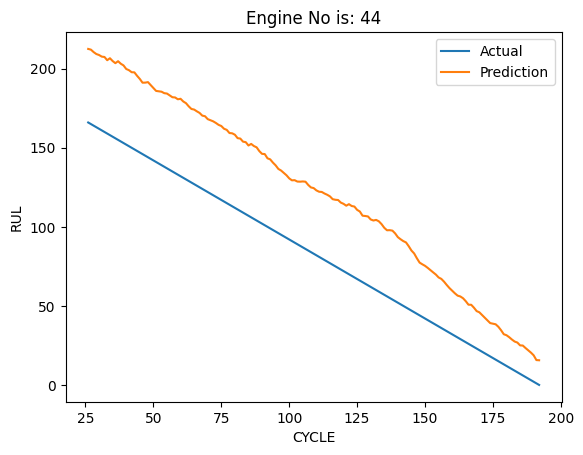



Shape of df for engine 39:  (128, 14)
4/4 [==============================] - 0s 4ms/step
RMSE on This set: 36.736338247069966


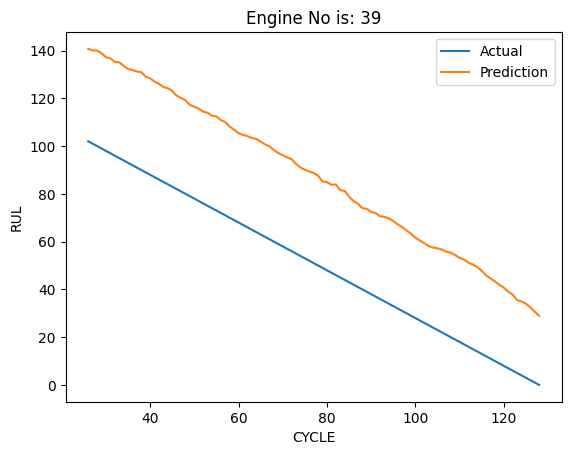



Shape of df for engine 17:  (276, 14)
8/8 [==============================] - 0s 3ms/step
RMSE on This set: 56.83080980767313


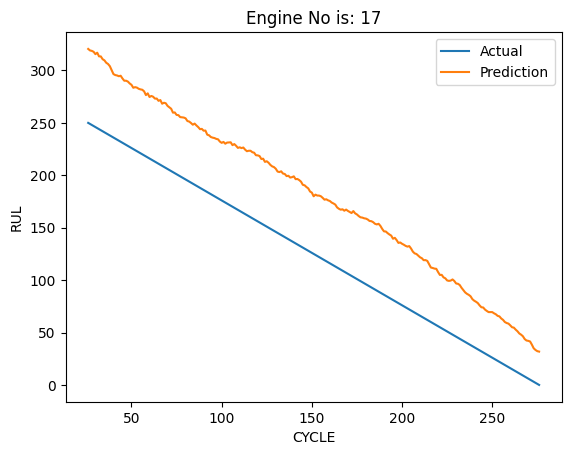

In [42]:
Train_no=1

m = np.random.randint(low=1,high=50,size=25) 

for i in m:    
    engine_id=i
    X,y,scaler,features=Data_format_conversion(Train_no,engine_id) 

    prediction=model.predict(X) 
    rev_trans =pd.concat([pd.DataFrame(features[win_length:]),pd.DataFrame(prediction)],axis=1)
    rev_trans = scaler.inverse_transform(rev_trans)
    rev_trans =pd.DataFrame(rev_trans)

    
    df=pd.read_csv("Processed_Train_00{}.csv".format(Train_no))
    df = df[df['ID']==engine_id]
    df_actual = df.drop(columns=['ID'])


    print('RMSE on This set:', np.sqrt(metrics.mean_squared_error(df_actual['RUL'][win_length:],rev_trans[13])))

    plt.plot(df_actual['Cycle'][win_length:],df_actual['RUL'][win_length:])
    plt.plot(rev_trans[0],rev_trans[13])
    plt.ylabel('RUL')
    plt.xlabel('CYCLE')
    plt.title('Engine No is: {}'.format(engine_id))
    plt.legend([ 'Actual','Prediction'], loc='upper right')
    plt.show()
    print('\n')

Predict on Test data

Shape of df for engine 95:  (283, 14)
9/9 [==============================] - 0s 3ms/step
RMSE on This set: 9.817393678625177


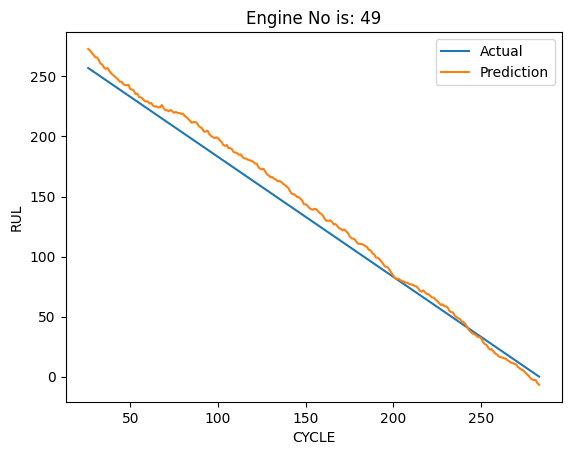



Shape of df for engine 60:  (172, 14)
5/5 [==============================] - 0s 3ms/step
RMSE on This set: 2.5394336699735263


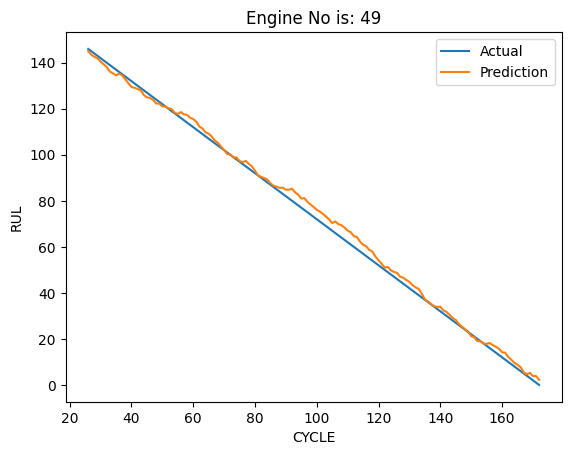



Shape of df for engine 98:  (156, 14)
5/5 [==============================] - 0s 3ms/step
RMSE on This set: 5.861534881211976


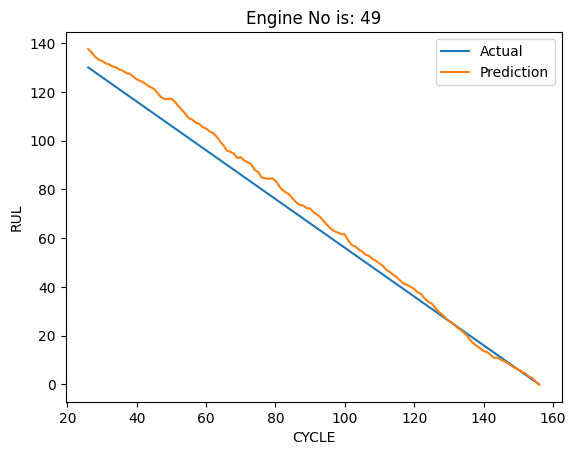



Shape of df for engine 99:  (185, 14)
5/5 [==============================] - 0s 3ms/step
RMSE on This set: 12.149489400178174


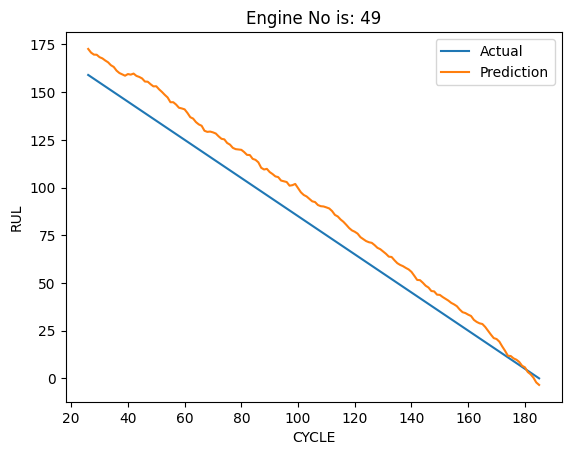



Shape of df for engine 91:  (135, 14)
4/4 [==============================] - 0s 3ms/step
RMSE on This set: 2.704259453041773


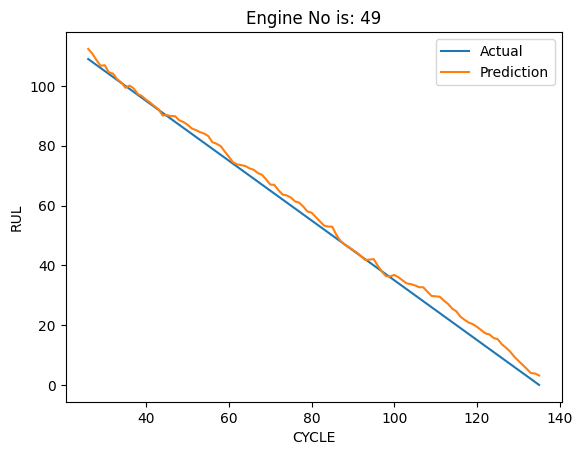



Shape of df for engine 71:  (208, 14)
6/6 [==============================] - 0s 3ms/step
RMSE on This set: 4.695836418362713


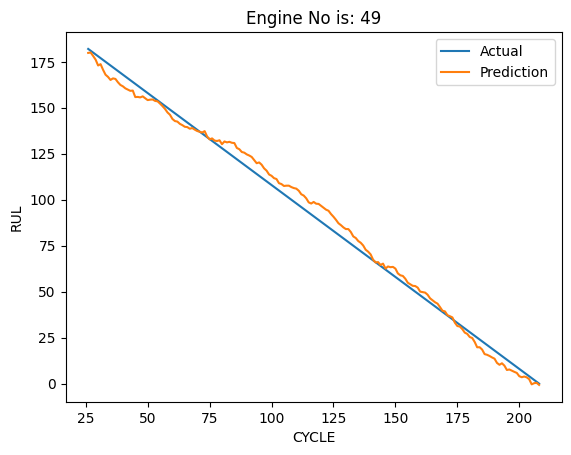



Shape of df for engine 57:  (137, 14)
4/4 [==============================] - 0s 4ms/step
RMSE on This set: 9.76079317263387


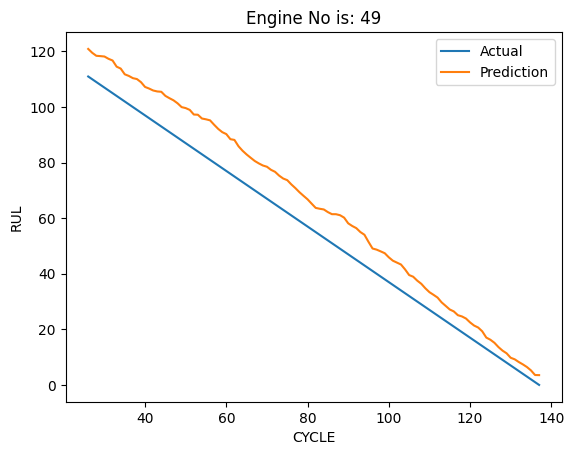



Shape of df for engine 60:  (172, 14)
5/5 [==============================] - 0s 3ms/step
RMSE on This set: 2.5394336699735263


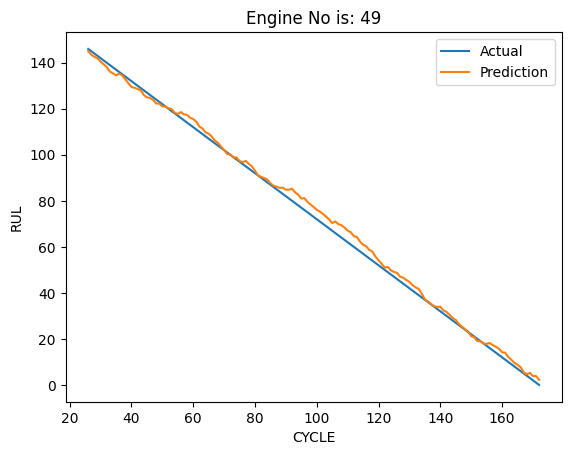



Shape of df for engine 79:  (199, 14)
6/6 [==============================] - 0s 4ms/step
RMSE on This set: 9.55263231925608


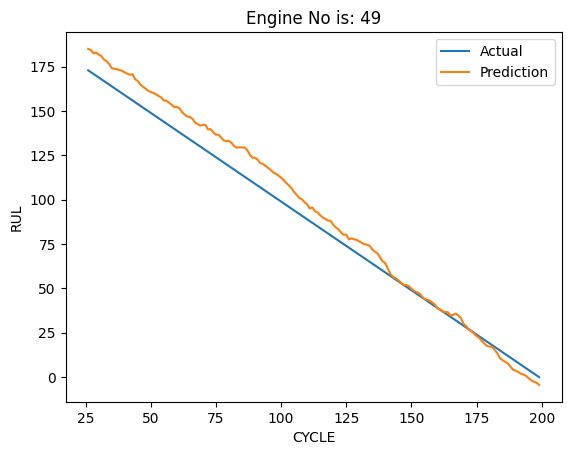



Shape of df for engine 76:  (210, 14)
6/6 [==============================] - 0s 3ms/step
RMSE on This set: 7.491597012647414


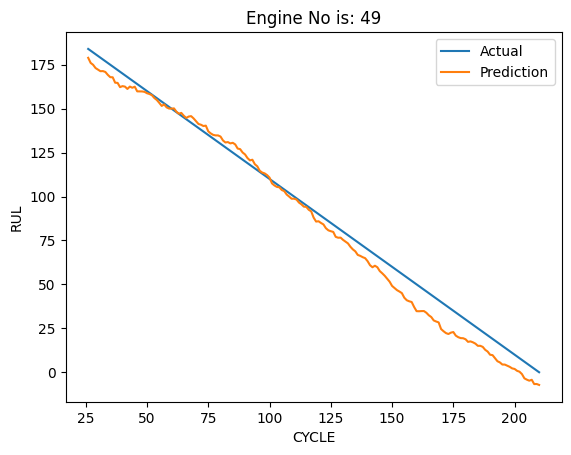



Shape of df for engine 52:  (213, 14)
6/6 [==============================] - 0s 3ms/step
RMSE on This set: 4.089176648871795


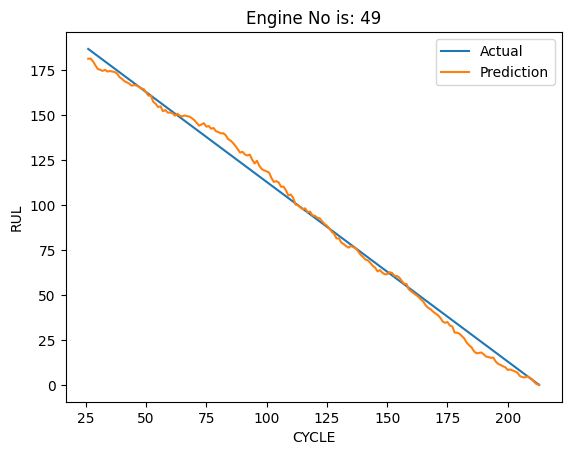



Shape of df for engine 86:  (278, 14)
8/8 [==============================] - 0s 3ms/step
RMSE on This set: 8.063962227204865


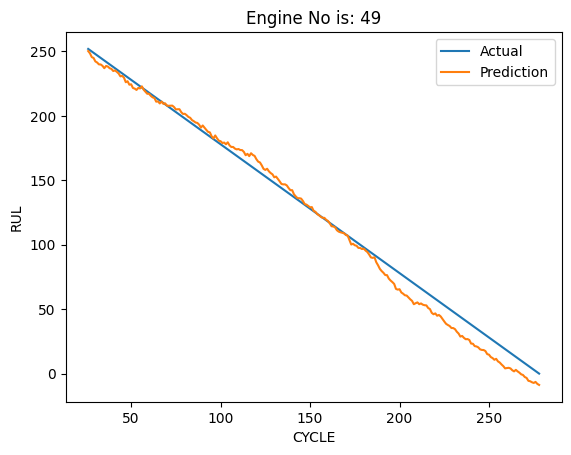



Shape of df for engine 54:  (257, 14)
8/8 [==============================] - 0s 3ms/step
RMSE on This set: 10.436747641112666


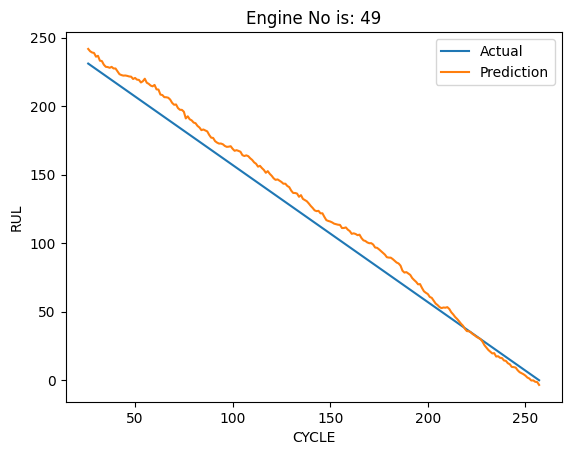



Shape of df for engine 81:  (240, 14)
7/7 [==============================] - 0s 4ms/step
RMSE on This set: 7.108859310390047


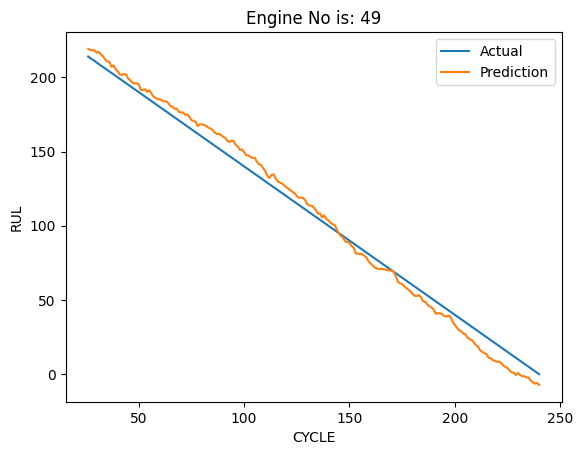



Shape of df for engine 64:  (283, 14)
9/9 [==============================] - 0s 3ms/step
RMSE on This set: 9.15550118173861


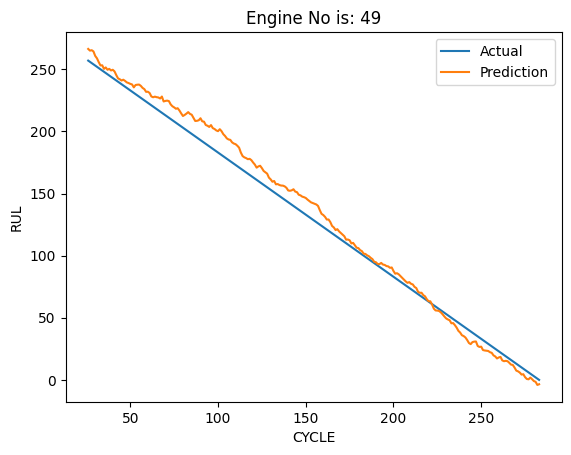



Shape of df for engine 91:  (135, 14)
4/4 [==============================] - 0s 7ms/step
RMSE on This set: 2.704259453041773


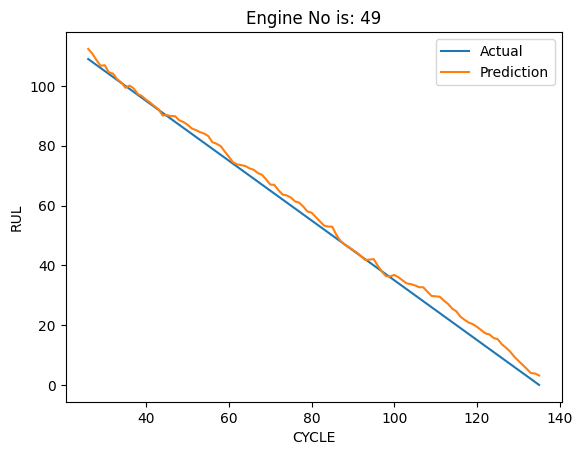



Shape of df for engine 82:  (214, 14)
6/6 [==============================] - 0s 4ms/step
RMSE on This set: 9.316563632331754


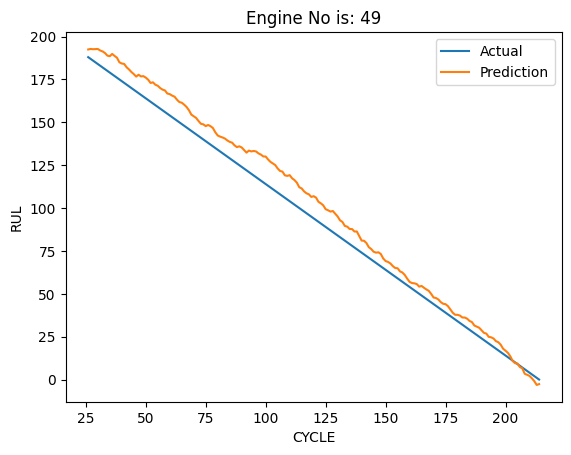



Shape of df for engine 60:  (172, 14)
5/5 [==============================] - 0s 3ms/step
RMSE on This set: 2.5394336699735263


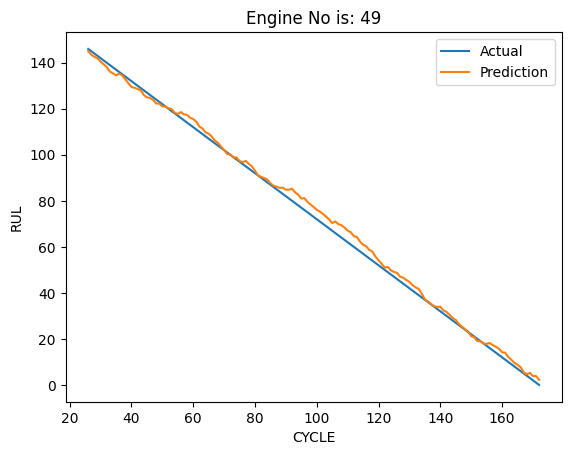



Shape of df for engine 79:  (199, 14)
6/6 [==============================] - 0s 2ms/step
RMSE on This set: 9.55263231925608


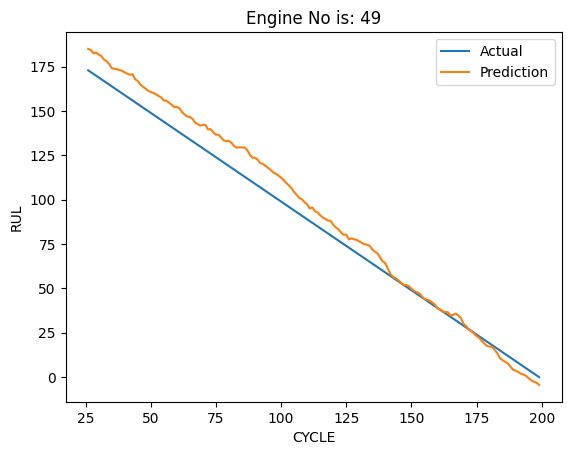



Shape of df for engine 94:  (258, 14)
8/8 [==============================] - 0s 3ms/step
RMSE on This set: 8.32751031067881


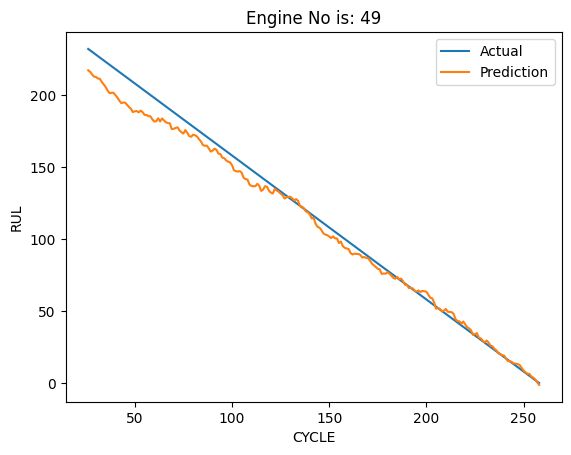



Shape of df for engine 86:  (278, 14)
8/8 [==============================] - 0s 5ms/step
RMSE on This set: 8.063962227204865


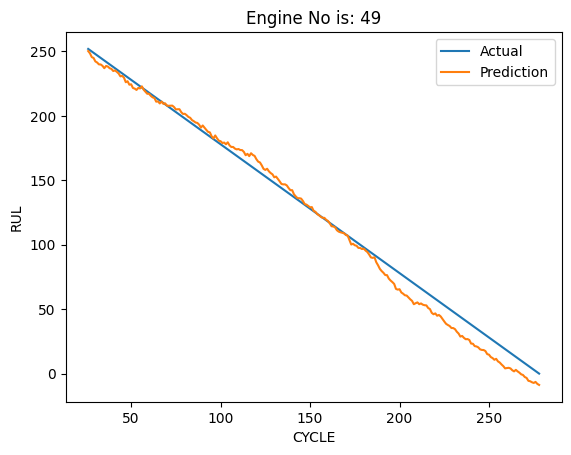



Shape of df for engine 70:  (137, 14)
4/4 [==============================] - 0s 3ms/step
RMSE on This set: 7.748526232201959


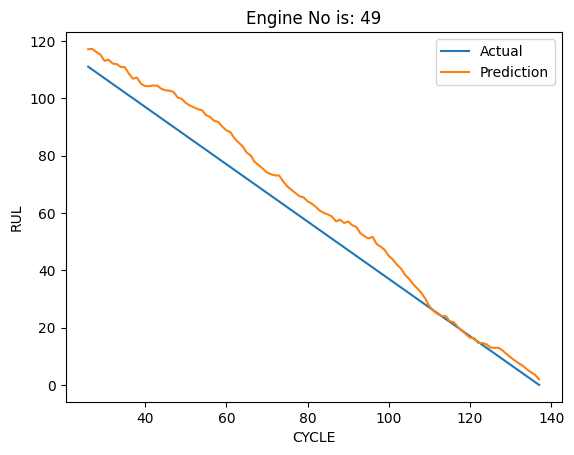



Shape of df for engine 83:  (293, 14)
9/9 [==============================] - 0s 2ms/step
RMSE on This set: 10.594368034582187


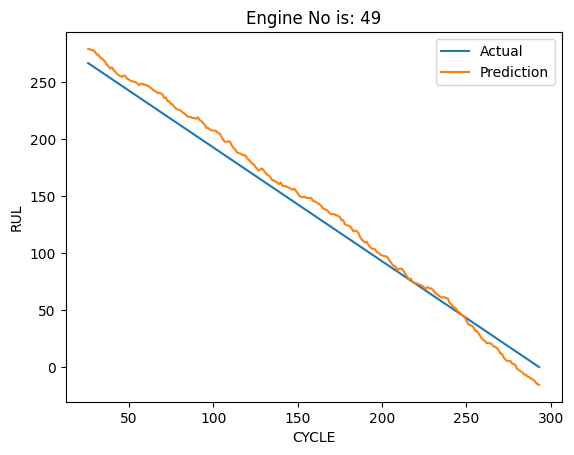



Shape of df for engine 54:  (257, 14)
8/8 [==============================] - 0s 2ms/step
RMSE on This set: 10.436747641112666


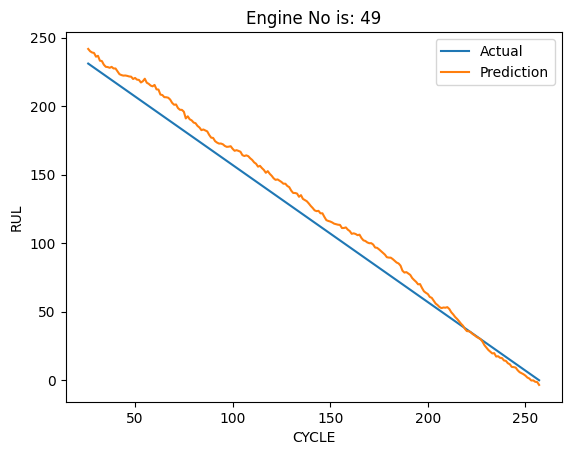



Shape of df for engine 64:  (283, 14)
9/9 [==============================] - 0s 3ms/step
RMSE on This set: 9.15550118173861


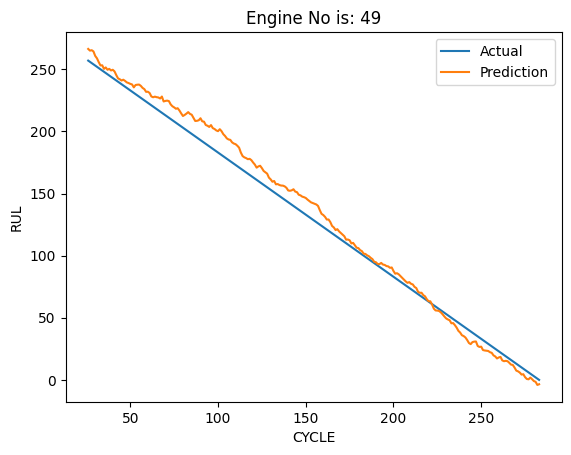

In [29]:
Train_no=1

n = np.random.randint(low=51,high=100,size=25) 

for i in n:    
    engine_id=i
    X,y,scaler,features=Data_format_conversion(Train_no,engine_id) 

    prediction=model.predict(X) ######### prediction on trained data
    rev_trans =pd.concat([pd.DataFrame(features[win_length:]),pd.DataFrame(prediction)],axis=1)
    rev_trans = scaler.inverse_transform(rev_trans)######## Transforming back to original scale
    rev_trans =pd.DataFrame(rev_trans)

    df=pd.read_csv("Processed_Train_00{}.csv".format(Train_no))
    df = df[df['ID']==engine_id]
    df_actual = df.drop(columns=['ID'])


    print('RMSE on This set:', np.sqrt(metrics.mean_squared_error(df_actual['RUL'][win_length:],rev_trans[13])))

    plt.plot(df_actual['Cycle'][win_length:],df_actual['RUL'][win_length:])
    plt.plot(rev_trans[0],rev_trans[13])
    plt.ylabel('RUL')
    plt.xlabel('CYCLE')
    plt.title('Engine No is: {}'.format(engine_no))
    plt.legend([ 'Actual','Prediction'], loc='upper right')
    plt.show()
    print('\n')

In [31]:
model.save("model_1.h5")
print("Saved model to disk")

Saved model to disk


Predict on Training data

Shape of df for engine 61:  (218, 14)
7/7 [==============================] - 0s 5ms/step
RMSE on This set: 68.43341284371135


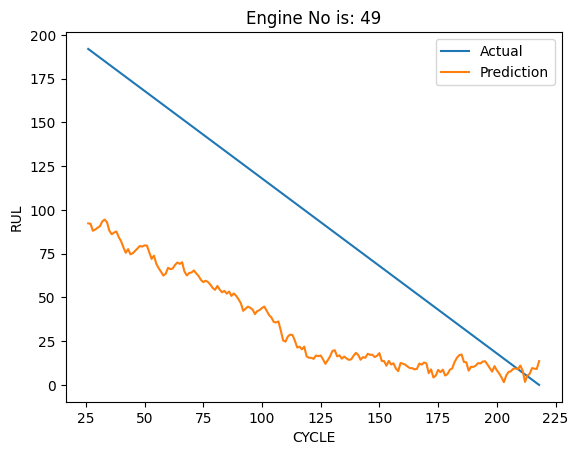



Shape of df for engine 94:  (306, 14)
9/9 [==============================] - 0s 3ms/step
RMSE on This set: 104.35667919538797


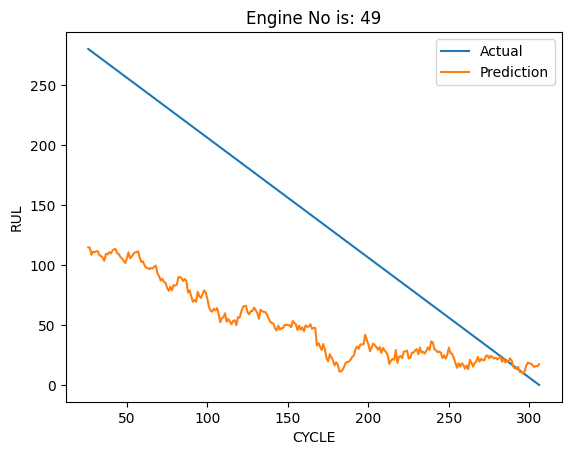



Shape of df for engine 79:  (181, 14)
5/5 [==============================] - 0s 4ms/step
RMSE on This set: 54.02803953574128


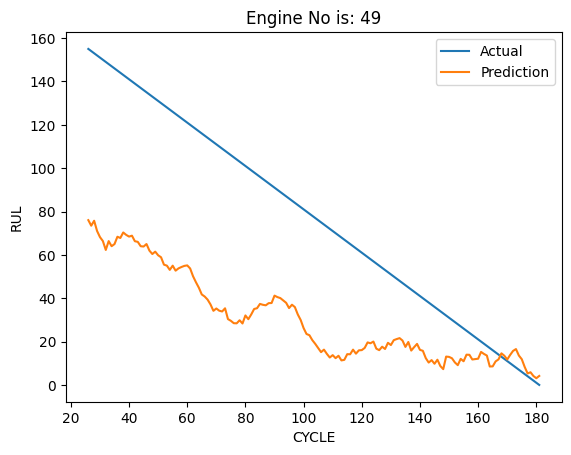



Shape of df for engine 85:  (347, 14)
11/11 [==============================] - 0s 3ms/step
RMSE on This set: 117.41773086364643


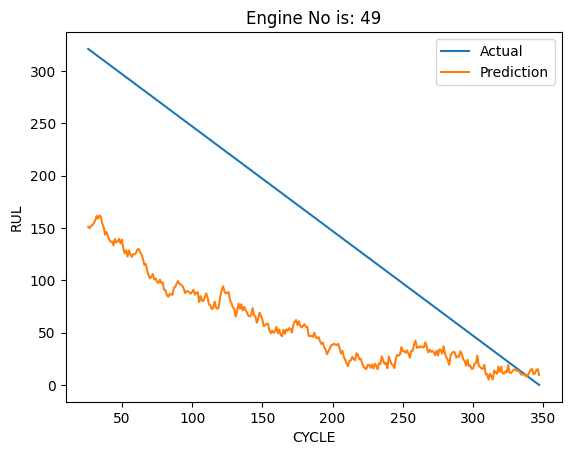



Shape of df for engine 71:  (194, 14)
6/6 [==============================] - 0s 3ms/step
RMSE on This set: 61.183286790718114


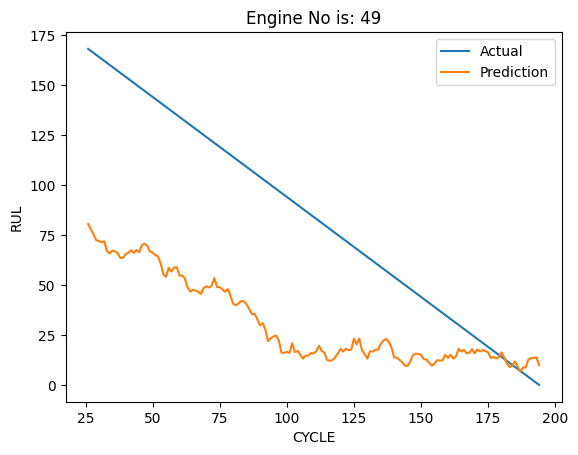



Shape of df for engine 90:  (188, 14)
6/6 [==============================] - 0s 3ms/step
RMSE on This set: 61.96004592717732


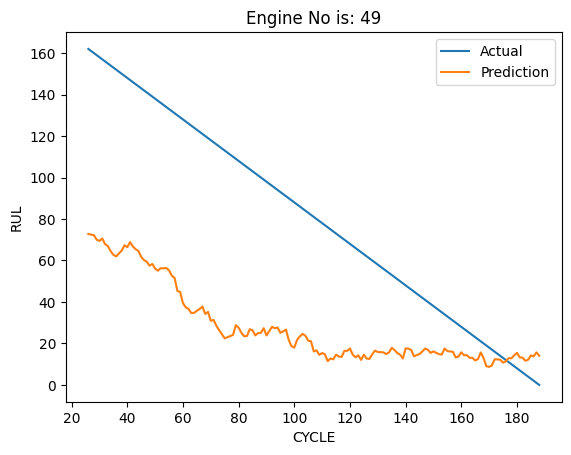



Shape of df for engine 70:  (156, 14)
5/5 [==============================] - 0s 3ms/step
RMSE on This set: 50.54585934188192


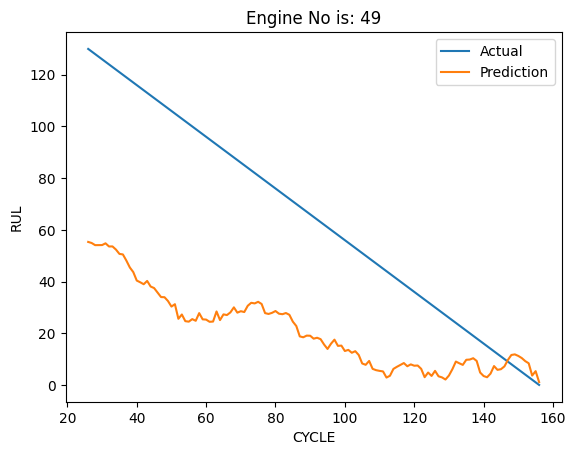



Shape of df for engine 64:  (282, 14)
9/9 [==============================] - 0s 3ms/step
RMSE on This set: 95.50882598163427


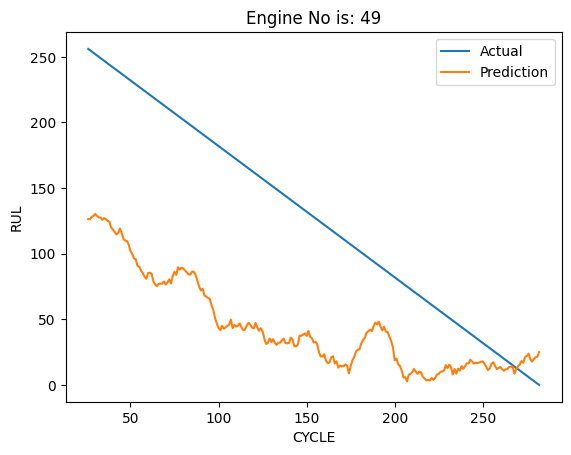



Shape of df for engine 76:  (244, 14)
7/7 [==============================] - 0s 3ms/step
RMSE on This set: 77.33545802215743


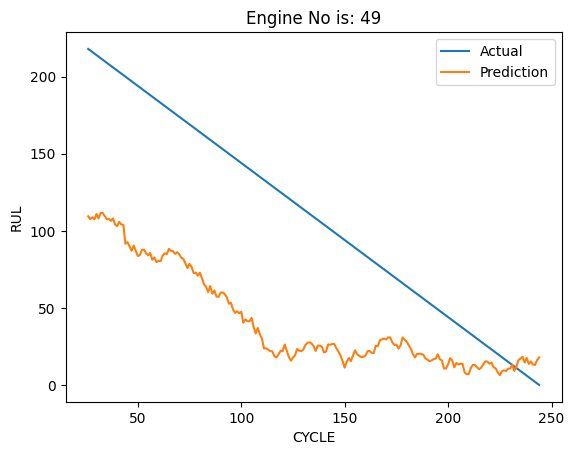



Shape of df for engine 64:  (282, 14)
9/9 [==============================] - 0s 4ms/step
RMSE on This set: 95.50882598163427


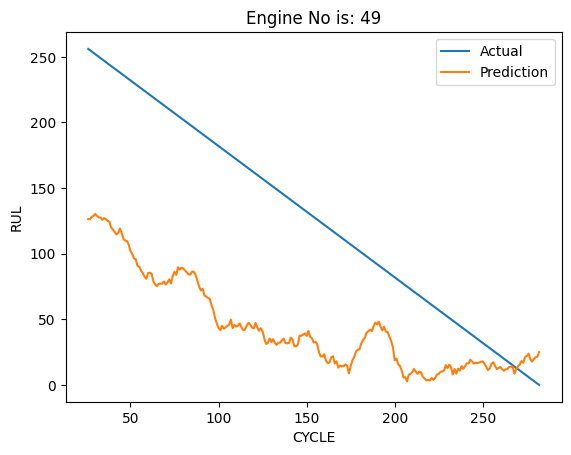



Shape of df for engine 86:  (190, 14)
6/6 [==============================] - 0s 3ms/step
RMSE on This set: 60.6192283547571


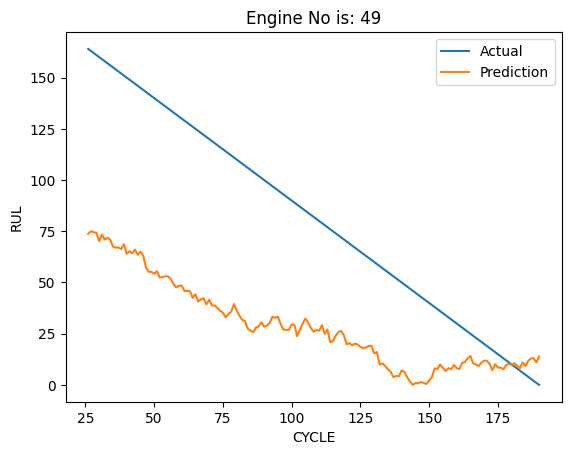



Shape of df for engine 62:  (184, 14)
5/5 [==============================] - 0s 3ms/step
RMSE on This set: 58.39416410500377


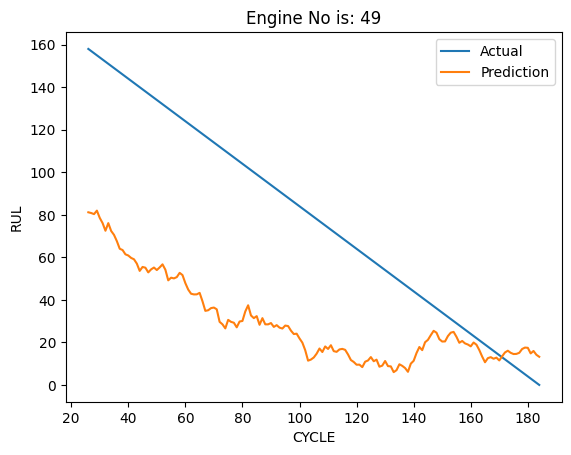



Shape of df for engine 70:  (156, 14)
5/5 [==============================] - 0s 3ms/step
RMSE on This set: 50.54585934188192


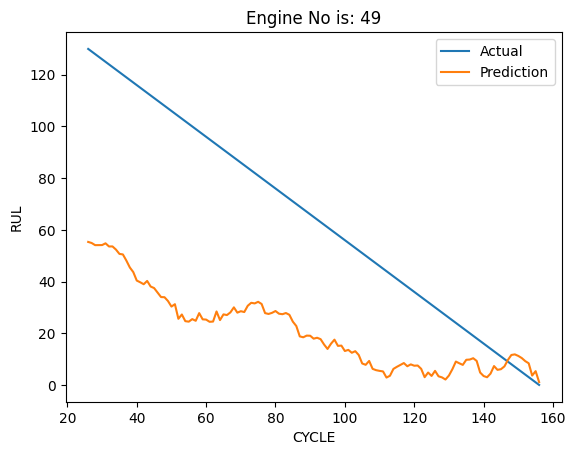



Shape of df for engine 72:  (196, 14)
6/6 [==============================] - 0s 3ms/step
RMSE on This set: 64.89508498617563


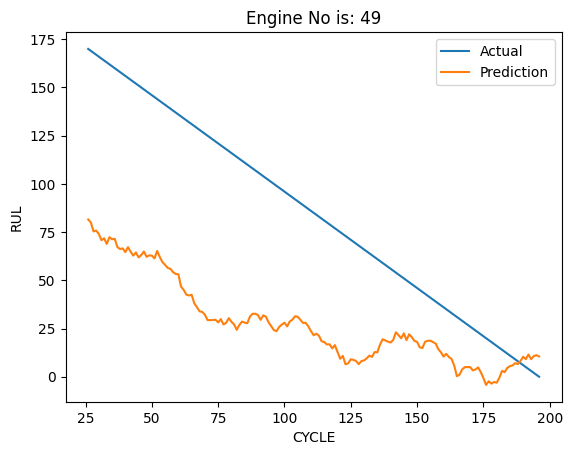



Shape of df for engine 83:  (170, 14)
5/5 [==============================] - 0s 4ms/step
RMSE on This set: 51.038630889292556


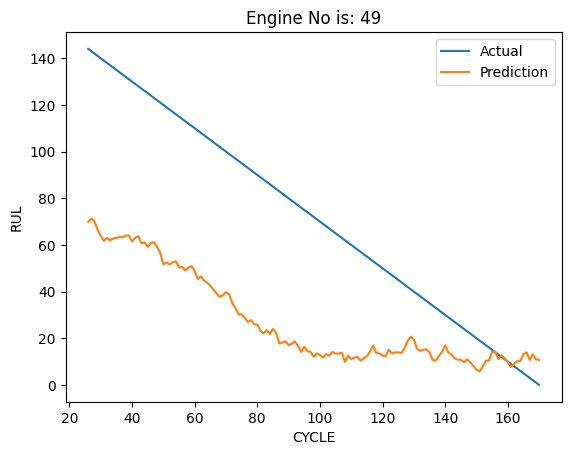



Shape of df for engine 86:  (190, 14)
6/6 [==============================] - 0s 3ms/step
RMSE on This set: 60.6192283547571


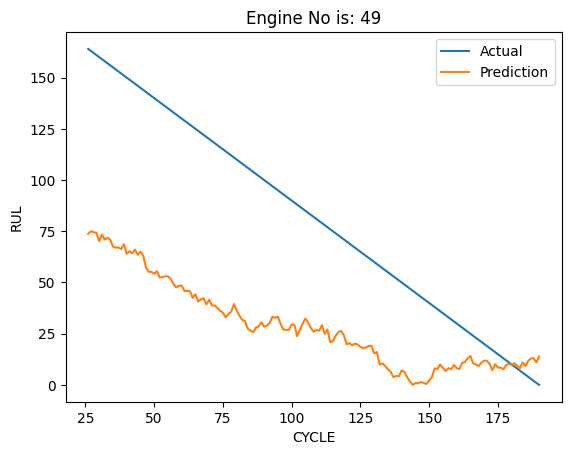



Shape of df for engine 78:  (161, 14)
5/5 [==============================] - 0s 3ms/step
RMSE on This set: 47.65776334342818


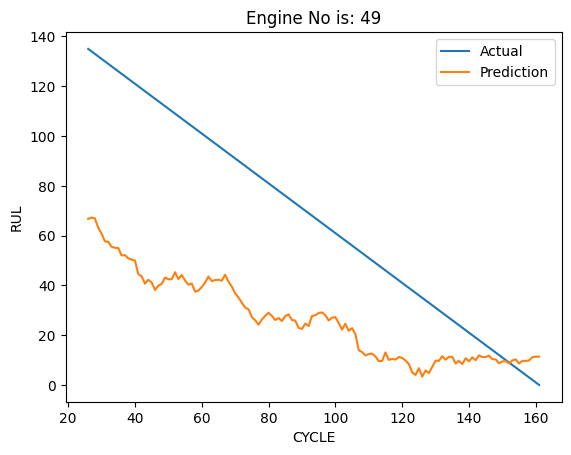



Shape of df for engine 68:  (185, 14)
5/5 [==============================] - 0s 2ms/step
RMSE on This set: 54.81767152964239


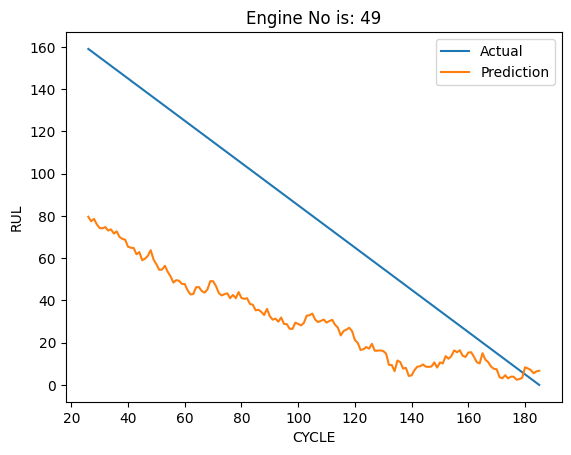



Shape of df for engine 79:  (181, 14)
5/5 [==============================] - 0s 3ms/step
RMSE on This set: 54.02803953574128


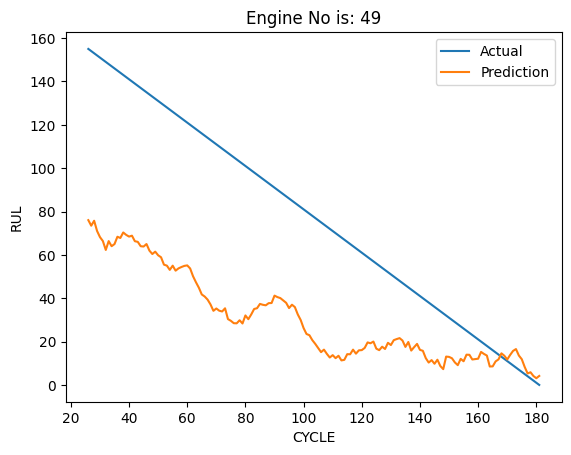



Shape of df for engine 73:  (239, 14)
7/7 [==============================] - 0s 3ms/step
RMSE on This set: 78.49202012300697


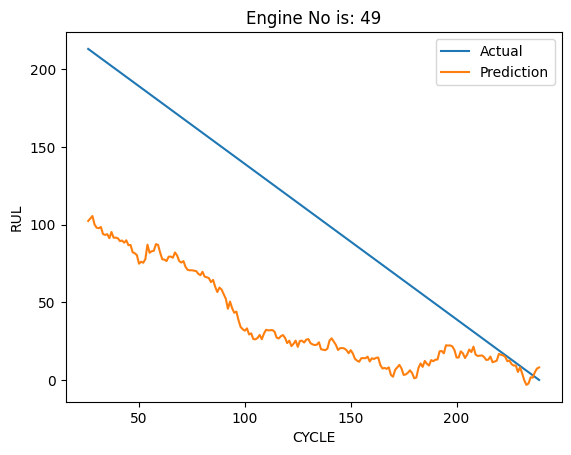



Shape of df for engine 63:  (168, 14)
5/5 [==============================] - 0s 3ms/step
RMSE on This set: 50.62532136530957


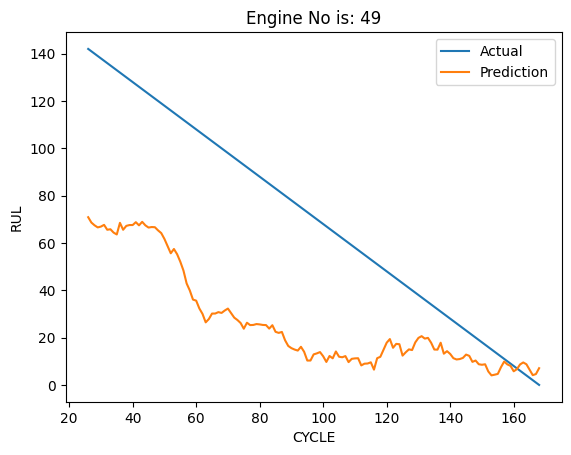



Shape of df for engine 96:  (208, 14)
6/6 [==============================] - 0s 2ms/step
RMSE on This set: 66.16965083684107


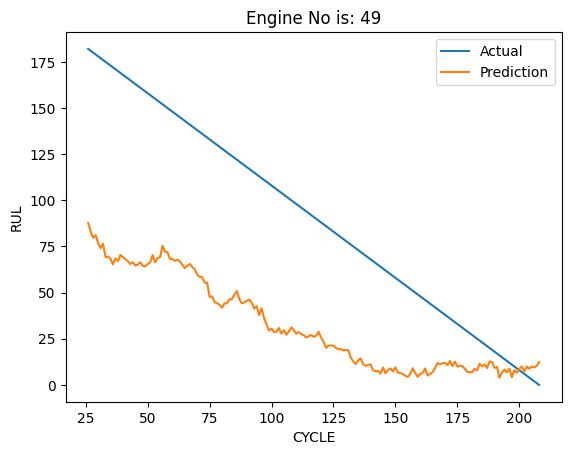



Shape of df for engine 86:  (190, 14)
6/6 [==============================] - 0s 2ms/step
RMSE on This set: 60.6192283547571


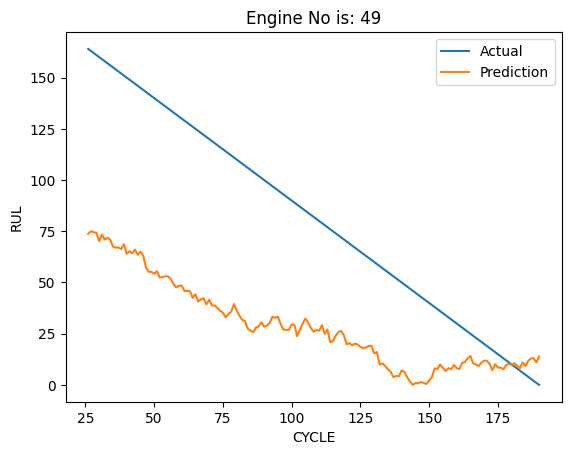



Shape of df for engine 99:  (202, 14)
6/6 [==============================] - 0s 2ms/step
RMSE on This set: 67.20746670528932


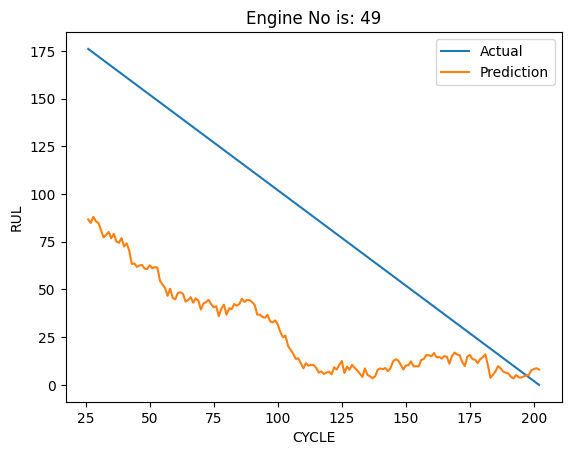



Shape of df for engine 67:  (145, 14)
4/4 [==============================] - 0s 2ms/step
RMSE on This set: 42.27191083023364


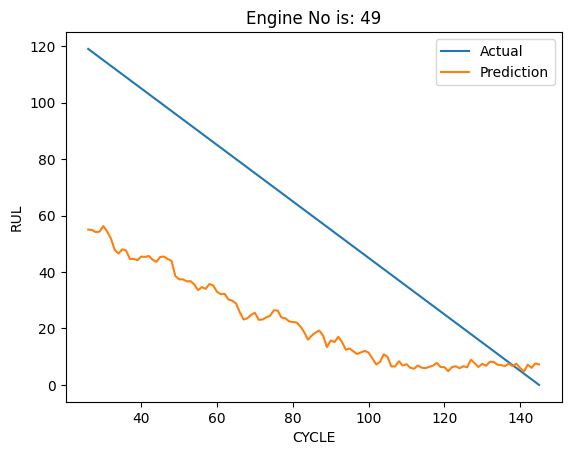

In [37]:
Train_no=2

n = np.random.randint(low=61,high=100,size=25) 

for i in n:    
    engine_id=i
    X,y,scaler,features=Data_format_conversion(Train_no,engine_id) 

    prediction=model.predict(X) 
    rev_trans =pd.concat([pd.DataFrame(features[win_length:]),pd.DataFrame(prediction)],axis=1)
    rev_trans = scaler.inverse_transform(rev_trans)
    rev_trans =pd.DataFrame(rev_trans)

    df=pd.read_csv("Processed_Train_00{}.csv".format(Train_no))
    df = df[df['ID']==engine_id]
    df_actual = df.drop(columns=['ID'])


    print('RMSE on This set:', np.sqrt(metrics.mean_squared_error(df_actual['RUL'][win_length:],rev_trans[13])))

    plt.plot(df_actual['Cycle'][win_length:],df_actual['RUL'][win_length:])
    plt.plot(rev_trans[0],rev_trans[13])
    plt.ylabel('RUL')
    plt.xlabel('CYCLE')
    plt.title('Engine No is: {}'.format(engine_no))
    plt.legend([ 'Actual','Prediction'], loc='upper right')
    plt.show()
    print('\n')


In [34]:
model.save("model_1.h5")
print("Saved model to disk")

Saved model to disk


In [41]:
print(x_temp.shape)
print(y_temp.shape)


(1, 25, 13)
(1,)
